Loaded 35 images. Feature vector shape: (35, 49152)
Average silhouette score for k=2: 0.1624


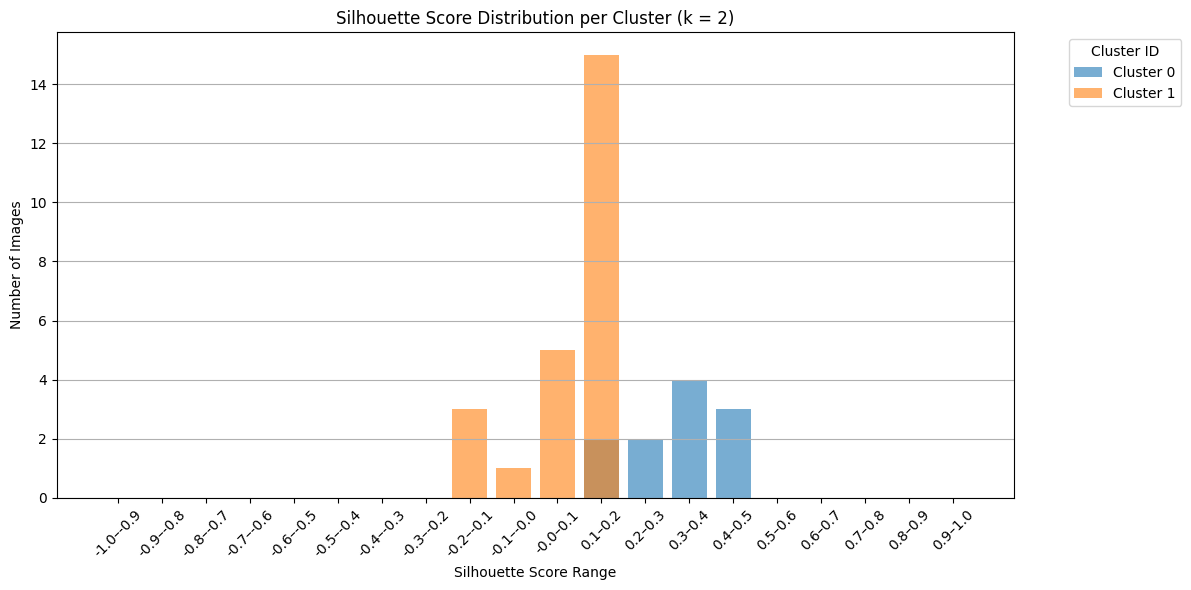

Average silhouette score for k=3: 0.1259


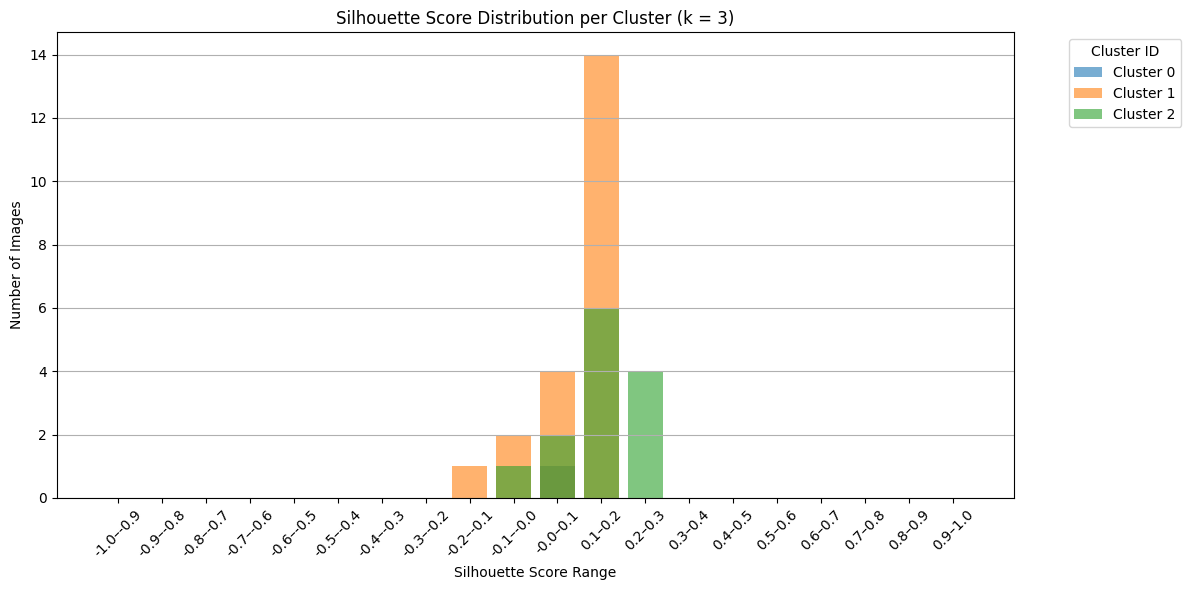

Average silhouette score for k=4: 0.1492


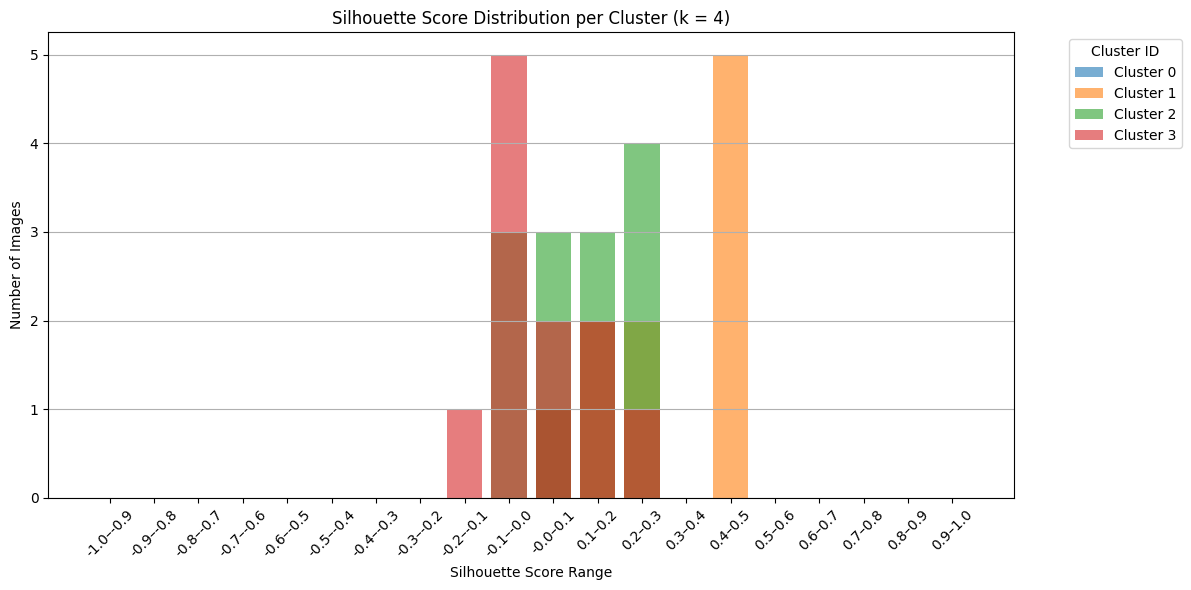

Average silhouette score for k=5: 0.1167


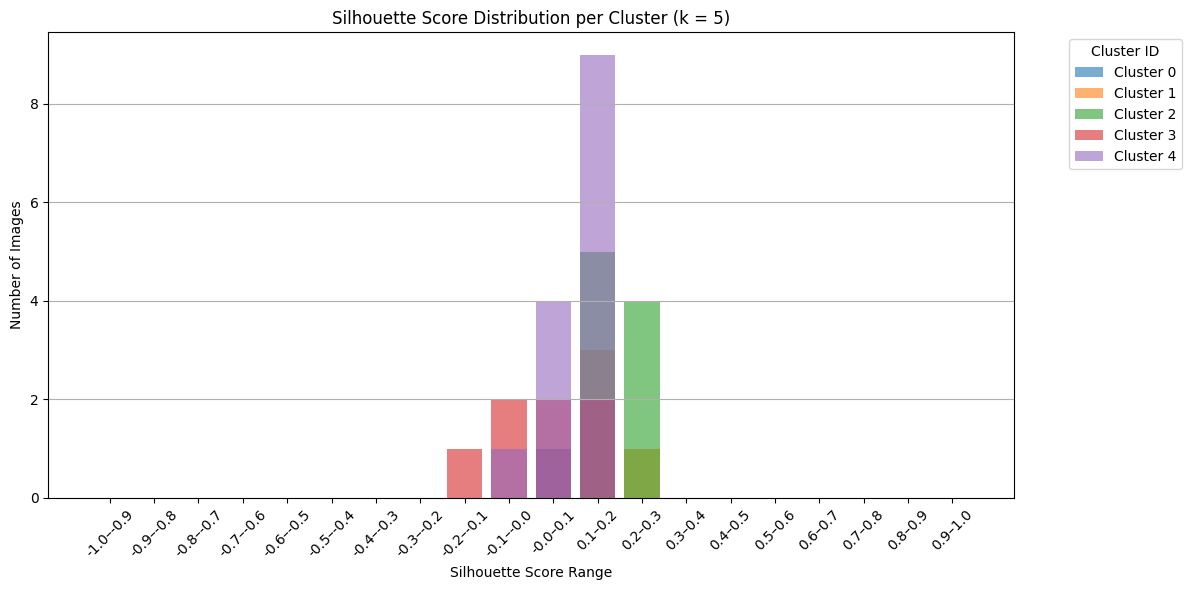

Average silhouette score for k=6: 0.1886


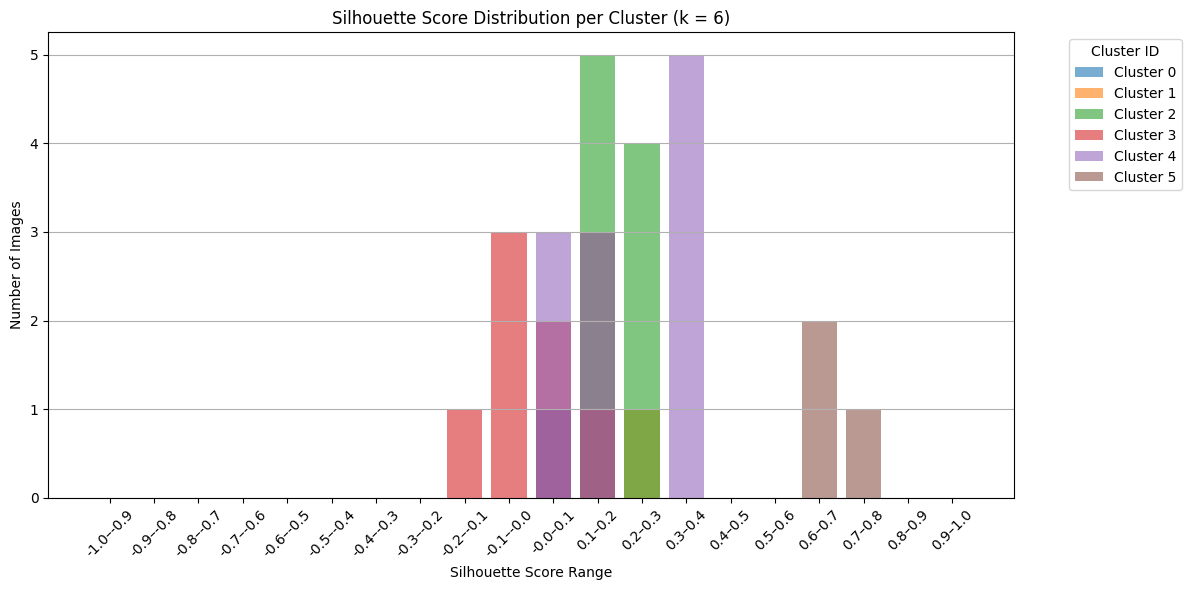

Average silhouette score for k=7: 0.2314


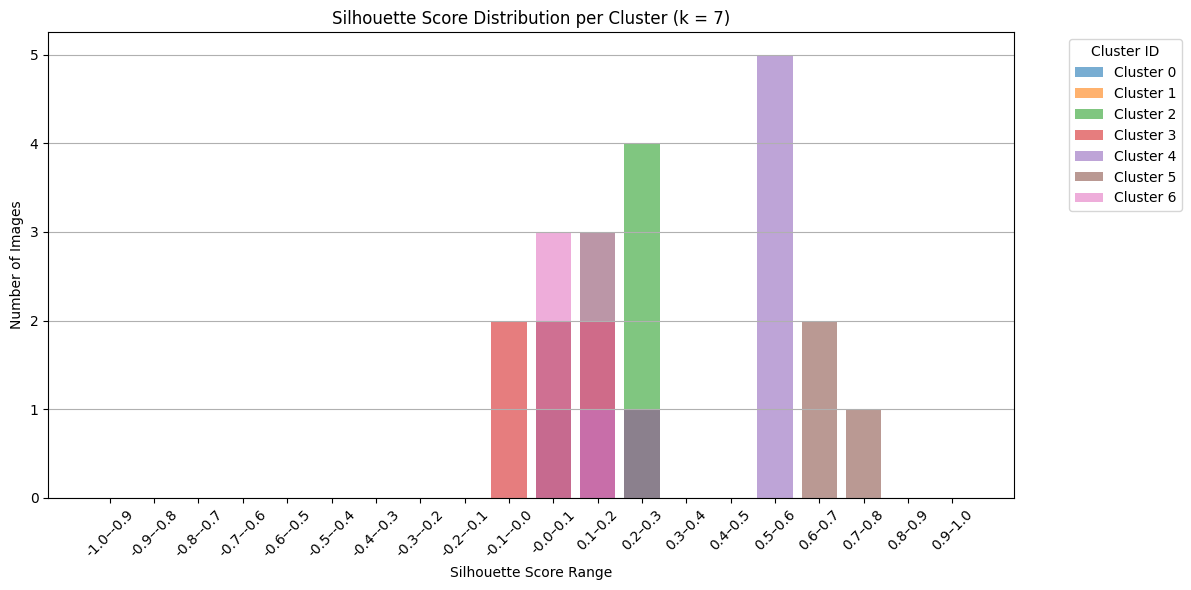

Average silhouette score for k=8: 0.3481


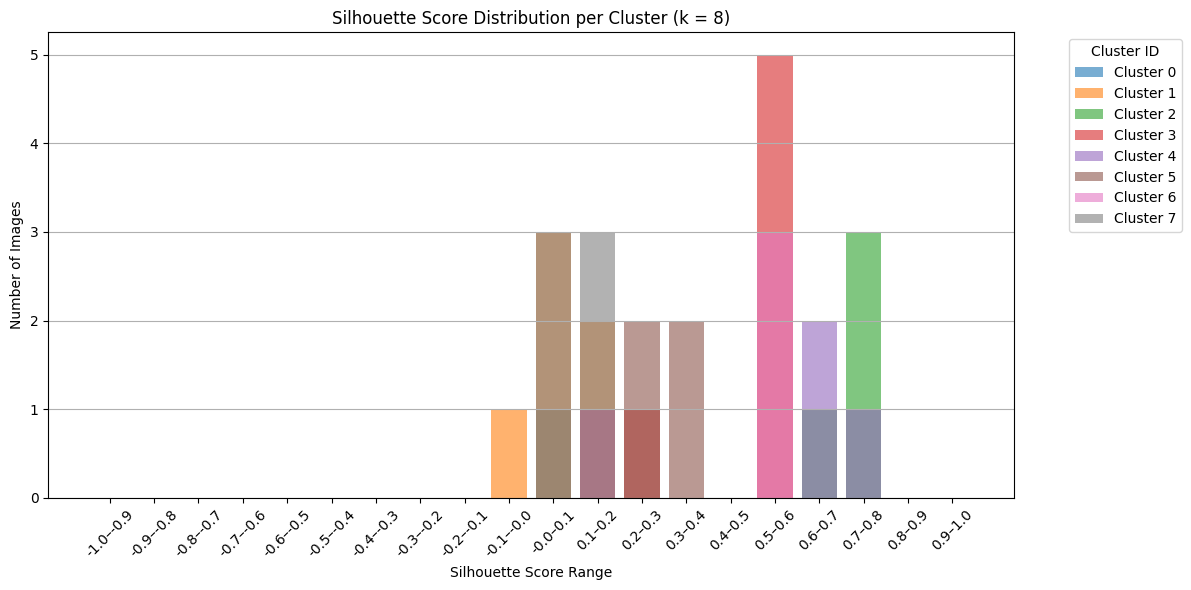

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score


image_folder = "/home/lucyliuu/Desktop/diverse_video1"
valid_exts = [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]

frames = []
for file in sorted(os.listdir(image_folder)):
    if any(file.lower().endswith(ext) for ext in valid_exts):
        img_path = os.path.join(image_folder, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        frames.append(img.flatten())

all_frames = np.array(frames)
print(f"Loaded {len(all_frames)} images. Feature vector shape: {all_frames.shape}")


k_values = range(2, 9)  # k = 2 to 10
bins = np.arange(-1.0, 1.05, 0.1)

for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(all_frames)

    silhouette_vals = silhouette_samples(all_frames, cluster_labels)
    avg_score = silhouette_score(all_frames, cluster_labels)
    print(f"Average silhouette score for k={k}: {avg_score:.4f}")

    plt.figure(figsize=(12, 6))
    for i in range(k):
        cluster_scores = silhouette_vals[cluster_labels == i]
        hist, _ = np.histogram(cluster_scores, bins=bins)
        plt.bar(
            [f"{round(bins[j], 1)}–{round(bins[j+1], 1)}" for j in range(len(hist))],
            hist,
            alpha=0.6,
            label=f"Cluster {i}",
            width=0.8,
        )

    plt.xlabel("Silhouette Score Range")
    plt.ylabel("Number of Images")
    plt.title(f"Silhouette Score Distribution per Cluster (k = {k})")
    plt.xticks(rotation=45)
    plt.legend(title="Cluster ID", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()



Loaded 35 images. Shape: (35, 49152)
k = 2  | Inertia = 809814326.1 | Silhouette = 0.1717 | DBI = 1.8761
k = 3  | Inertia = 707918819.9 | Silhouette = 0.1654 | DBI = 1.6655
k = 4  | Inertia = 607186907.1 | Silhouette = 0.1802 | DBI = 1.6140
k = 5  | Inertia = 546018179.4 | Silhouette = 0.2092 | DBI = 1.5223
k = 6  | Inertia = 446855236.2 | Silhouette = 0.2742 | DBI = 1.5116
k = 7  | Inertia = 357524376.1 | Silhouette = 0.3368 | DBI = 1.1970
k = 8  | Inertia = 412080303.3 | Silhouette = 0.2465 | DBI = 1.2212


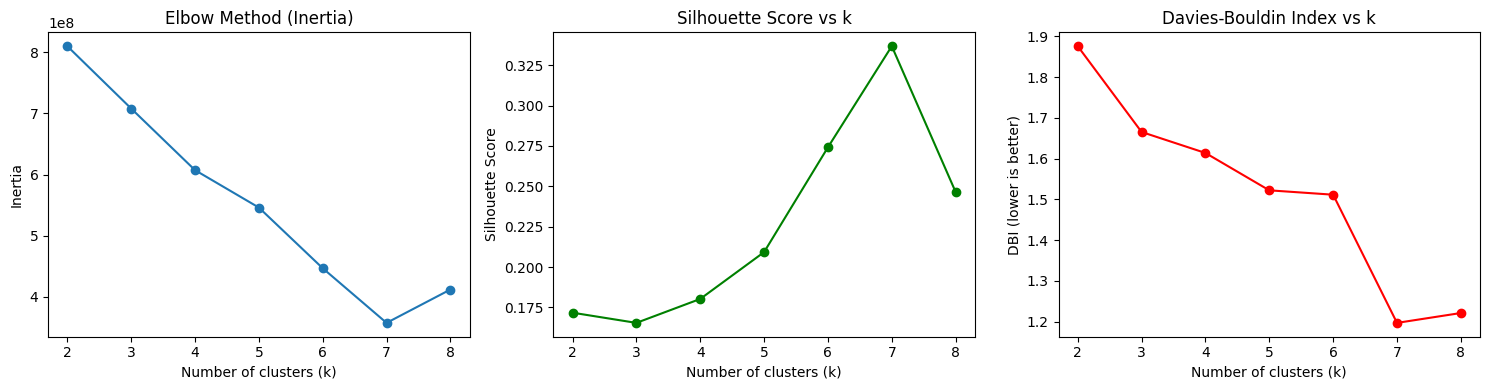

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


image_folder = "/home/lucyliuu/Desktop/diverse_video1"
valid_exts = [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]

frames = []
for file in sorted(os.listdir(image_folder)):
    if any(file.lower().endswith(ext) for ext in valid_exts):
        img_path = os.path.join(image_folder, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        frames.append(img.flatten())

all_frames = np.array(frames)
print(f"Loaded {len(all_frames)} images. Shape: {all_frames.shape}")

k_range = range(2, 9)
inertias = []
silhouette_scores = []
dbi_scores = []

for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(all_frames)

    inertia = kmeans.inertia_
    sil_score = silhouette_score(all_frames, labels)
    dbi = davies_bouldin_score(all_frames, labels)

    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    dbi_scores.append(dbi)

    print(f"k = {k:<2} | Inertia = {inertia:.1f} | Silhouette = {sil_score:.4f} | DBI = {dbi:.4f}")

plt.figure(figsize=(15, 4))

# Elbow Method
plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, 'o-')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# Silhouette Scores
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'o-', color='green')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_range, dbi_scores, 'o-', color='red')
plt.title("Davies-Bouldin Index vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("DBI (lower is better)")

plt.tight_layout()
plt.show()


Loaded 35 images. Shape: (35, 49152)
k = 2  | Inertia = 809814326.1 | Silhouette = 0.1717 | DBI = 1.8761
k = 3  | Inertia = 707918819.9 | Silhouette = 0.1654 | DBI = 1.6655
k = 4  | Inertia = 607186907.1 | Silhouette = 0.1802 | DBI = 1.6140
k = 5  | Inertia = 546018179.4 | Silhouette = 0.2092 | DBI = 1.5223
k = 6  | Inertia = 446855236.2 | Silhouette = 0.2742 | DBI = 1.5116
k = 7  | Inertia = 357524376.1 | Silhouette = 0.3368 | DBI = 1.1970
k = 8  | Inertia = 412080303.3 | Silhouette = 0.2465 | DBI = 1.2212


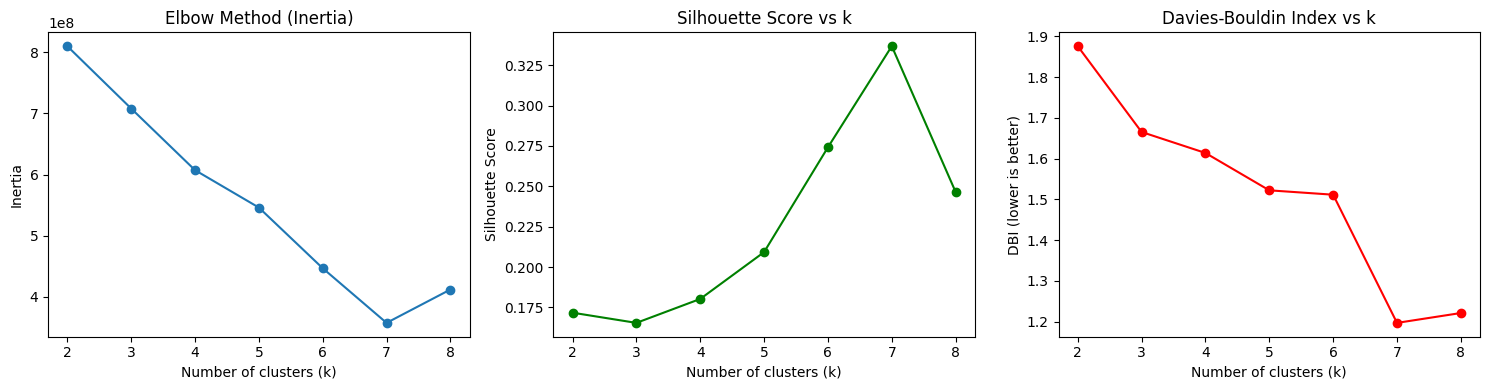


Cluster Assignments for k=5:
Cluster 0: ['img21062.png', 'img21066.png']
Cluster 1: ['img25514.png', 'img27351.png', 'img27357.png', 'img32086.png', 'img67848.png', 'img67856.png', 'img67857.png', 'img67858.png']
Cluster 2: ['img01767.png', 'img03039.png', 'img21273.png', 'img21274.png', 'img68625.png', 'img68626.png', 'img68627.png', 'img68628.png', 'img68629.png']
Cluster 3: ['img04523.png', 'img10460.png', 'img14983.png', 'img15336.png', 'img16043.png', 'img16750.png', 'img33288.png']
Cluster 4: ['img05725.png', 'img11732.png', 'img11773.png', 'img11774.png', 'img11775.png', 'img17182.png', 'img17183.png', 'img17184.png', 'img17188.png']


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# === Load images ===
image_folder = "/home/lucyliuu/Desktop/diverse_video1"
valid_exts = [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]

frames = []
filenames = []  # NEW: store filenames

for file in sorted(os.listdir(image_folder)):
    if any(file.lower().endswith(ext) for ext in valid_exts):
        img_path = os.path.join(image_folder, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        frames.append(img.flatten())
        filenames.append(file)  # Save filename

all_frames = np.array(frames)
print(f"Loaded {len(all_frames)} images. Shape: {all_frames.shape}")

# === Initialize clustering evaluation ===
k_range = range(2, 9)
inertias = []
silhouette_scores = []
dbi_scores = []
cluster_assignments = {}  # NEW: store assignments

# === Perform clustering ===
for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(all_frames)

    inertia = kmeans.inertia_
    sil_score = silhouette_score(all_frames, labels)
    dbi = davies_bouldin_score(all_frames, labels)

    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    dbi_scores.append(dbi)

    print(f"k = {k:<2} | Inertia = {inertia:.1f} | Silhouette = {sil_score:.4f} | DBI = {dbi:.4f}")

    # Save which images are in which cluster for this k
    cluster_to_files = {i: [] for i in range(k)}
    for file, label in zip(filenames, labels):
        cluster_to_files[label].append(file)

    cluster_assignments[k] = cluster_to_files

# === Plot evaluation curves ===
plt.figure(figsize=(15, 4))

# Elbow Method
plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, 'o-')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# Silhouette Scores
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'o-', color='green')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_range, dbi_scores, 'o-', color='red')
plt.title("Davies-Bouldin Index vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("DBI (lower is better)")

plt.tight_layout()
plt.show()

# === Print example of cluster assignments ===
# Example: show cluster assignments for k=5
selected_k = 5
print(f"\nCluster Assignments for k={selected_k}:")
for cluster_id, files in cluster_assignments[selected_k].items():
    print(f"Cluster {cluster_id}: {files}")


In [4]:
# === Print example of cluster assignments ===
# Example: show cluster assignments for k=5
selected_k = 7
print(f"\nCluster Assignments for k={selected_k}:")
for cluster_id, files in cluster_assignments[selected_k].items():
    print(f"Cluster {cluster_id}: {files}")



Cluster Assignments for k=7:
Cluster 0: ['img21062.png', 'img21066.png']
Cluster 1: ['img25514.png', 'img27351.png', 'img27357.png', 'img32086.png', 'img33288.png', 'img67848.png']
Cluster 2: ['img01767.png', 'img03039.png', 'img68625.png', 'img68626.png', 'img68627.png', 'img68628.png', 'img68629.png']
Cluster 3: ['img04523.png', 'img05725.png', 'img10460.png', 'img14983.png', 'img15336.png', 'img16043.png', 'img16750.png']
Cluster 4: ['img11732.png', 'img11773.png', 'img11774.png', 'img11775.png', 'img17182.png', 'img17183.png', 'img17184.png', 'img17188.png']
Cluster 5: ['img67856.png', 'img67857.png', 'img67858.png']
Cluster 6: ['img21273.png', 'img21274.png']


In [ ]:
# === Imports ===
import os
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# === STEP 1: Load Keypoints Data ===
csv_path = "/home/Desktop/diverse-lucy-2025-04-28/labeled-data/video_1/CollectedData_lucy.csv"  # <-- CHANGE HERE

# Read the DeepLabCut CSV (handle multi-index header)
keypoints_df = pd.read_csv(csv_path, header=[0,1,2])
print(f"CSV loaded with shape {keypoints_df.shape} and columns {keypoints_df.columns.levels}")

# === STEP 2: Organize keypoints per image ===
# Index is the frame names (e.g., 'img01767.png')
keypoints_df.index = keypoints_df.iloc[:, 0]
keypoints_df = keypoints_df.drop(columns=keypoints_df.columns[0])

# Build {image filename: keypoint vector} dictionary
image_to_keypoints = {}

for image_name in keypoints_df.index.unique():
    coords = []
    for bodypart in keypoints_df.columns.get_level_values(1).unique():
        try:
            x = keypoints_df.loc[image_name, (slice(None), bodypart, 'x')]
            y = keypoints_df.loc[image_name, (slice(None), bodypart, 'y')]
            coords.append(float(x))
            coords.append(float(y))
        except KeyError:
            # Missing body part coordinate
            coords.append(np.nan)
            coords.append(np.nan)
    image_to_keypoints[image_name] = np.array(coords)

print(f"Loaded keypoints for {len(image_to_keypoints)} images.")

# === STEP 3: Define your cluster assignments ===
# Your clusters (from your message for k=7)
cluster_assignments_k7 = {
    0: ['img21062.png', 'img21066.png'],
    1: ['img25514.png', 'img27351.png', 'img27357.png', 'img32086.png', 'img33288.png', 'img67848.png'],
    2: ['img01767.png', 'img03039.png', 'img68625.png', 'img68626.png', 'img68627.png', 'img68628.png', 'img68629.png'],
    3: ['img04523.png', 'img05725.png', 'img10460.png', 'img14983.png', 'img15336.png', 'img16043.png', 'img16750.png'],
    4: ['img11732.png', 'img11773.png', 'img11774.png', 'img11775.png', 'img17182.png', 'img17183.png', 'img17184.png', 'img17188.png'],
    5: ['img67856.png', 'img67857.png', 'img67858.png'],
    6: ['img21273.png', 'img21274.png']
}

# === STEP 4: Analyze Cluster Consistency ===
cluster_consistency = {}

for cluster_id, image_list in cluster_assignments_k7.items():
    valid_keypoints = [image_to_keypoints[img] for img in image_list if img in image_to_keypoints]
    
    if len(valid_keypoints) < 2:
        print(f"Warning: Cluster {cluster_id} has less than 2 valid images, skipping...")
        cluster_consistency[cluster_id] = np.nan
        continue

    keypoint_matrix = np.vstack(valid_keypoints)

    distances = pdist(keypoint_matrix, metric='euclidean')
    avg_distance = np.mean(distances)

    cluster_consistency[cluster_id] = avg_distance

# === STEP 5: Display Results ===
consistency_df = pd.DataFrame.from_dict(cluster_consistency, orient='index', columns=['Avg_Pairwise_Distance'])
consistency_df.index.name = 'Cluster ID'

print("\n=== Average Keypoint Distance per Cluster ===")
print(consistency_df)

# Plot
plt.figure(figsize=(8,5))
plt.bar(consistency_df.index, consistency_df['Avg_Pairwise_Distance'])
plt.xlabel('Cluster ID')
plt.ylabel('Average Pairwise Distance')
plt.title('Cluster Consistency Based on Keypoints')
plt.grid(True)
plt.show()


In [10]:
def add_image_to_dataset(image_path, frame_list, resize_dim=(128, 128)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, resize_dim)
    frame_list.append(img.flatten())
    return frame_list


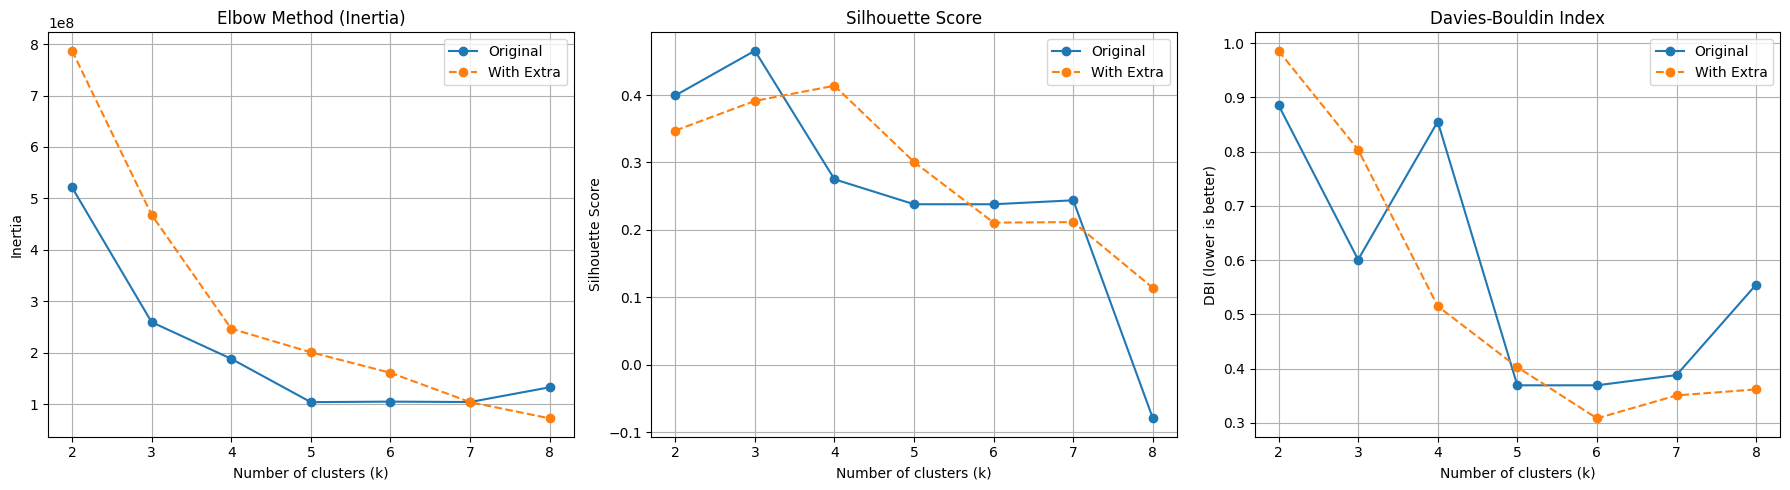

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
import matplotlib.ticker as ticker


image_folder = "/home/lucyliuu/Desktop/diverse_video1"
valid_exts = [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]

def load_images_from_folder(folder):
    frames = []
    for file in sorted(os.listdir(folder)):
        if any(file.lower().endswith(ext) for ext in valid_exts):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (128, 128))
            frames.append(img.flatten())
    return frames


frames_original = load_images_from_folder(image_folder)

new_image_path = "/home/lucyliuu/Desktop/img04275.png"
img = cv2.imread(new_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (128, 128))
img_vector = img.flatten()

frames_with_extra = frames_original.copy()
frames_with_extra.append(img_vector)


all_frames_original = np.array(frames_original)
all_frames_extra = np.array(frames_with_extra)

k_range = range(2, 9)
bins = np.arange(-1.0, 1.05, 0.1)


def evaluate_clustering_metrics(frames_set):
    inertias = []
    silhouettes = []
    dbis = []
    silhouette_distributions = {}

    for k in k_range:
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(frames_set)

        inertia = kmeans.inertia_
        sil_score = silhouette_score(frames_set, labels)
        dbi = davies_bouldin_score(frames_set, labels)
        sil_vals = silhouette_samples(frames_set, labels)

        inertias.append(inertia)
        silhouettes.append(sil_score)
        dbis.append(dbi)

        if k == 10:  # For detailed silhouette histogram comparison
            silhouette_distributions[k] = (labels, sil_vals)

    return inertias, silhouettes, dbis, silhouette_distributions

inertias_orig, sil_orig, dbi_orig, sil_dist_orig = evaluate_clustering_metrics(all_frames_original)
inertias_extra, sil_extra, dbi_extra, sil_dist_extra = evaluate_clustering_metrics(all_frames_extra)

def plot_silhouette_histogram(silhouette_distributions, title, color):
    labels, sil_vals = silhouette_distributions[10]
    k = len(np.unique(labels))

    plt.figure(figsize=(12, 5))
    for i in range(k):
        cluster_scores = sil_vals[labels == i]
        hist, bins_ = np.histogram(cluster_scores, bins=bins)
        plt.bar(
            [f"{round(bins_[j], 1)}–{round(bins_[j+1], 1)}" for j in range(len(hist))],
            hist,
            alpha=0.5,
            label=f"Cluster {i}",
            width=0.8,
            color=color,
        )

    plt.xlabel("Silhouette Score Range")
    plt.ylabel("Number of Samples")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(title="Cluster ID", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(k_range, inertias_orig, 'o-', label='Original')
axs[0].plot(k_range, inertias_extra, 'o--', label='With Extra')
axs[0].set_title("Elbow Method (Inertia)")
axs[0].set_xlabel("Number of clusters (k)")
axs[0].set_ylabel("Inertia")
axs[0].legend()

axs[1].plot(k_range, sil_orig, 'o-', label='Original')
axs[1].plot(k_range, sil_extra, 'o--', label='With Extra')
axs[1].set_title("Silhouette Score")
axs[1].set_xlabel("Number of clusters (k)")
axs[1].set_ylabel("Silhouette Score")
axs[1].legend()

axs[2].plot(k_range, dbi_orig, 'o-', label='Original')
axs[2].plot(k_range, dbi_extra, 'o--', label='With Extra')
axs[2].set_title("Davies-Bouldin Index")
axs[2].set_xlabel("Number of clusters (k)")
axs[2].set_ylabel("DBI (lower is better)")
axs[2].legend()

for ax in axs:
    ax.grid(True)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


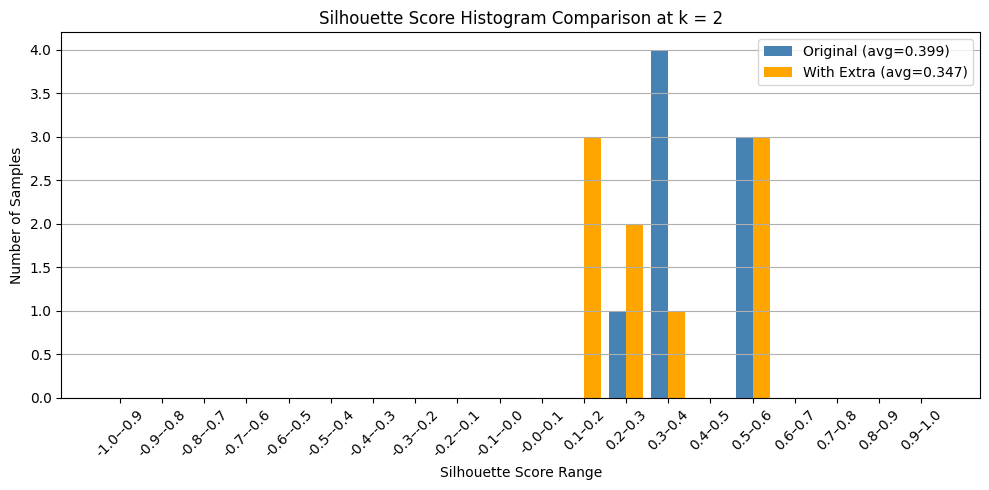

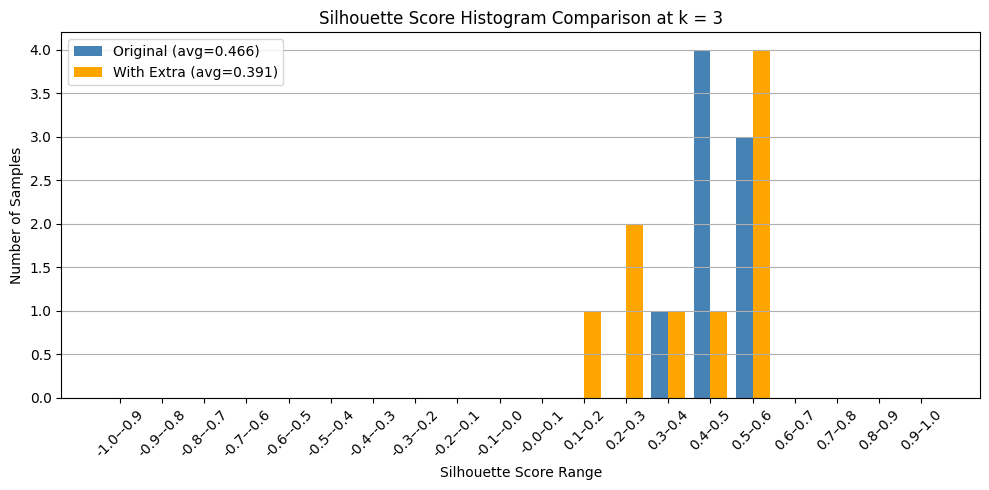

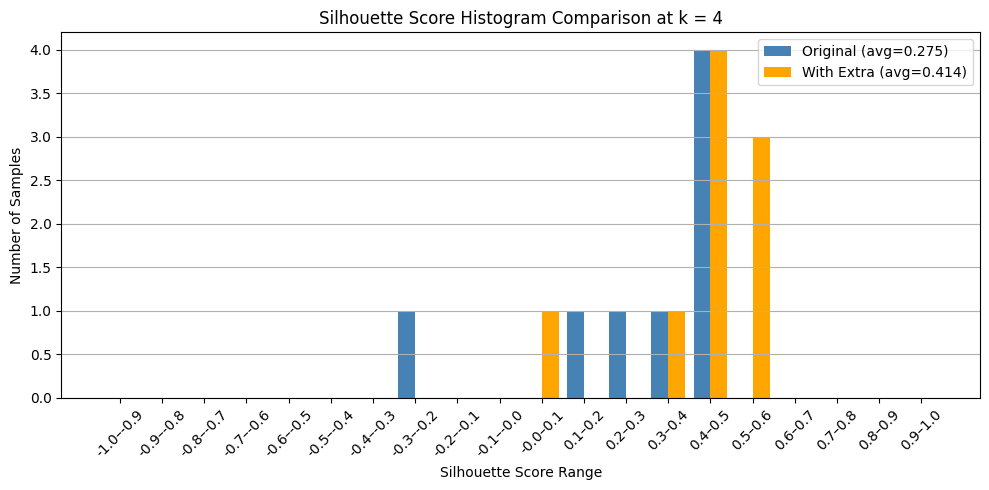

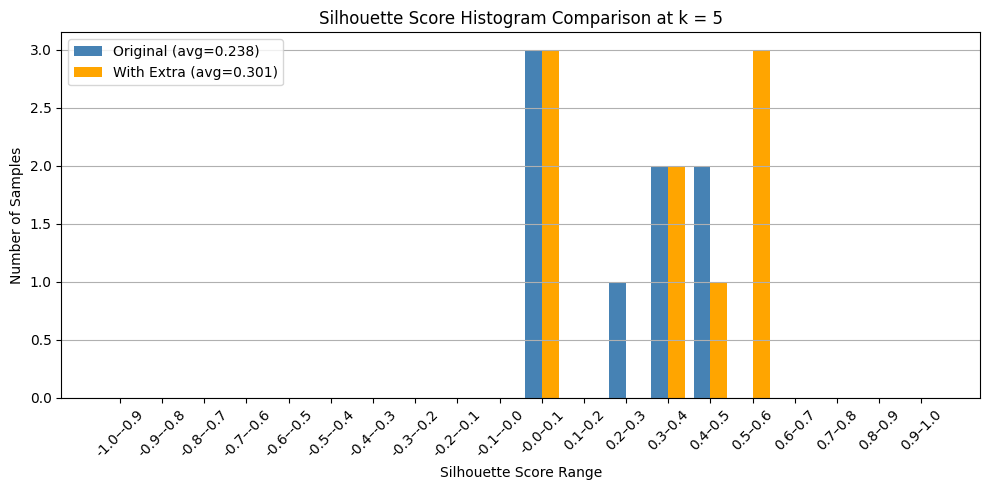

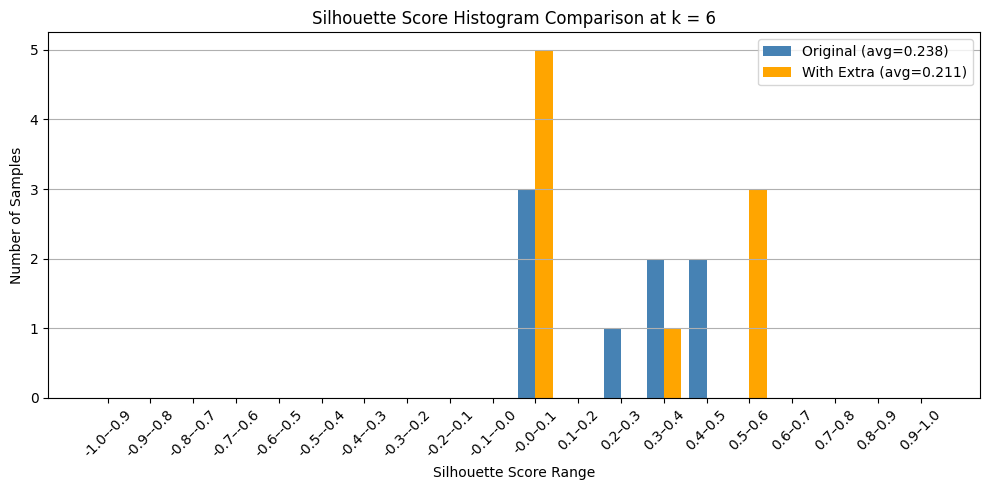

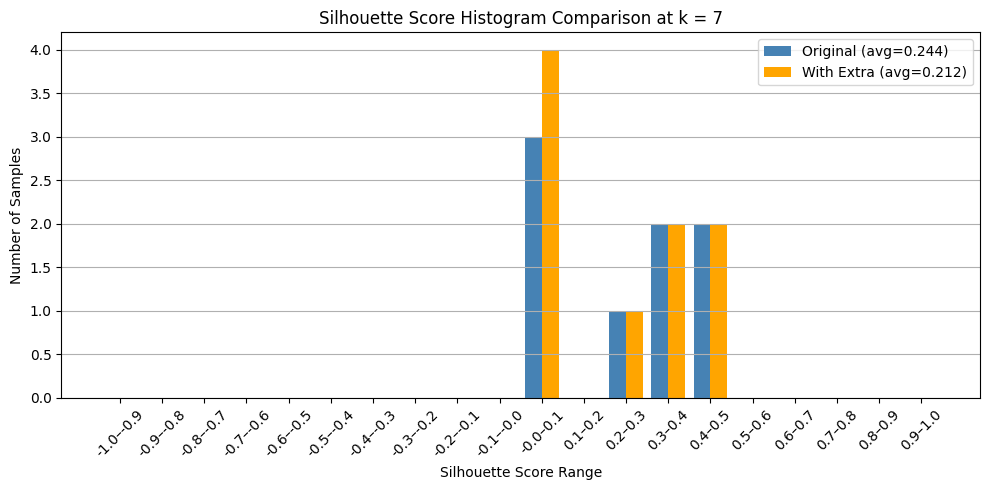

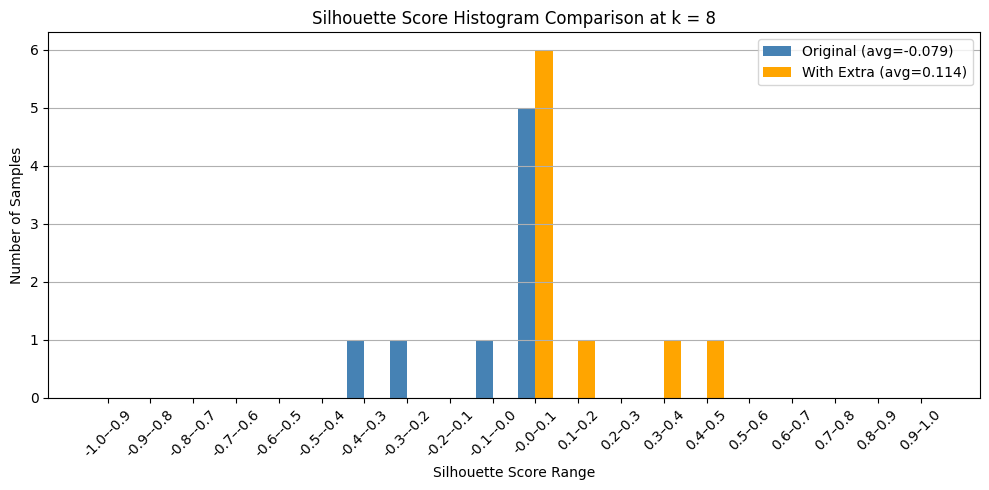

In [12]:


bins = np.arange(-1.0, 1.05, 0.1)
k_values_for_hist = range(2, 9)



def overlay_silhouette_histograms_with_avg(original_frames, extra_frames, color_orig, color_extra):
    for k in k_values_for_hist:
        if len(original_frames) < k or len(extra_frames) < k:
            continue

        # Original set
        kmeans_orig = MiniBatchKMeans(n_clusters=k, random_state=42)
        labels_orig = kmeans_orig.fit_predict(original_frames)
        sil_vals_orig = silhouette_samples(original_frames, labels_orig)
        avg_sil_orig = silhouette_score(original_frames, labels_orig)

        # Extra set
        kmeans_extra = MiniBatchKMeans(n_clusters=k, random_state=42)
        labels_extra = kmeans_extra.fit_predict(extra_frames)
        sil_vals_extra = silhouette_samples(extra_frames, labels_extra)
        avg_sil_extra = silhouette_score(extra_frames, labels_extra)

        # Histogram data
        hist_orig, _ = np.histogram(sil_vals_orig, bins=bins)
        hist_extra, _ = np.histogram(sil_vals_extra, bins=bins)
        bin_labels = [f"{round(bins[i], 1)}–{round(bins[i+1], 1)}" for i in range(len(hist_orig))]

        # Plot
        x = np.arange(len(bin_labels))
        width = 0.4

        plt.figure(figsize=(10, 5))
        plt.bar(x - width/2, hist_orig, width, label=f'Original (avg={avg_sil_orig:.3f})', color=color_orig)
        plt.bar(x + width/2, hist_extra, width, label=f'With Extra (avg={avg_sil_extra:.3f})', color=color_extra)

        plt.xlabel("Silhouette Score Range")
        plt.ylabel("Number of Samples")
        plt.title(f"Silhouette Score Histogram Comparison at k = {k}")
        plt.xticks(ticks=x, labels=bin_labels, rotation=45)
        plt.legend()
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()


overlay_silhouette_histograms_with_avg(all_frames_original, all_frames_extra, 'steelblue', 'orange')
